In [ ]:
# %pip install tensorflow

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = load_breast_cancer(as_frame=True).frame

In [3]:
X = df.drop('target',axis=1)
y = df.target

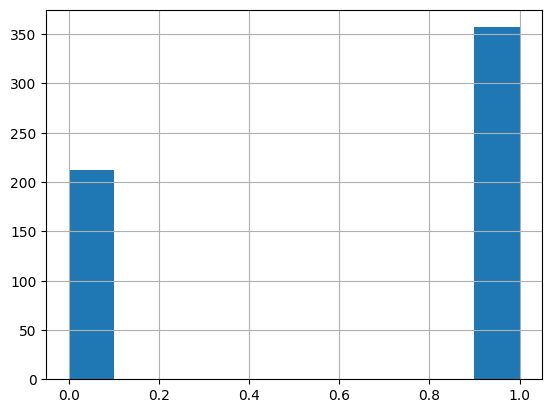

In [4]:
y.hist();

In [5]:
X_train, X_val, y_train_pd, y_val_pd = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
y_train, y_val = y_train_pd.to_numpy(), y_val_pd.to_numpy()

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [7]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

<Axes: >

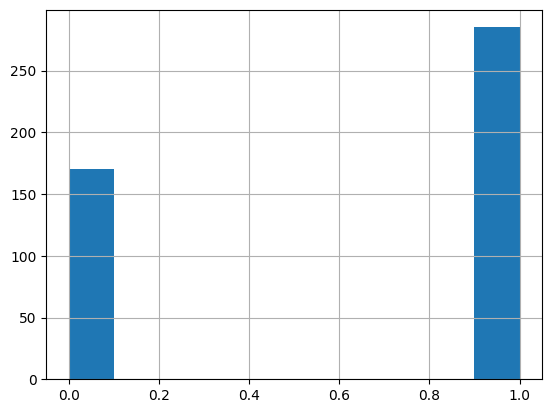

In [8]:
y_train_pd.hist()

In [9]:
from sklearn.utils import class_weight

# Получение весов классов
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([1.33823529, 0.79824561])

In [11]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0], 1:class_weights[1]})

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 843ms/step - accuracy: 0.5891 - loss: 0.6583 - val_accuracy: 0.7807 - val_loss: 0.5667
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8221 - loss: 0.5188 - val_accuracy: 0.8246 - val_loss: 0.4731
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8895 - loss: 0.4215 - val_accuracy: 0.8684 - val_loss: 0.4017
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9241 - loss: 0.3502 - val_accuracy: 0.8772 - val_loss: 0.3463
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9285 - loss: 0.2954 - val_accuracy: 0.8860 - val_loss: 0.3024
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9492 - loss: 0.2506 - val_accuracy: 0.9123 - val_loss: 0.2669
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9525 - loss: 0.2258 - val_accuracy: 0.9211 - val_loss: 0.2387
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9595 - loss: 0.1965 - val_accuracy: 0.9298 - val_loss: 0.2154

In [12]:
# Получение значений лосса и валидационного лосса из истории
def check_metrics(history, figure_name):

    train = history.history[f'{figure_name}']
    val = history.history[f'val_{figure_name}']

    # Построение графика лосса и валидационного лосса
    epochs = range(1, len(train) + 1)
    plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')
    plt.plot(epochs, val, 'b', label=f'Validation {figure_name}')
    plt.title(f'Training and Validation {figure_name}')
    plt.xlabel('Epochs')
    plt.ylabel(f'{figure_name}')
    plt.legend()
    plt.show()

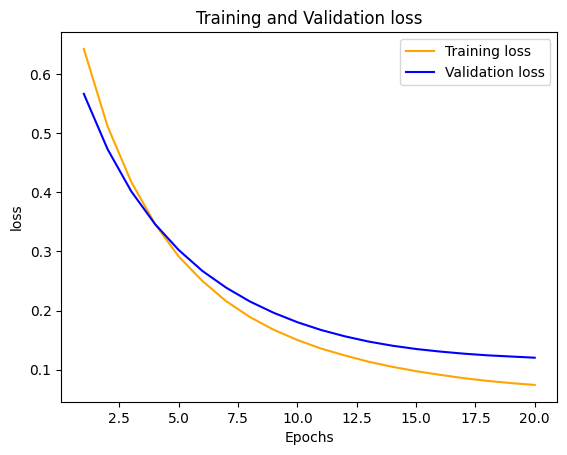

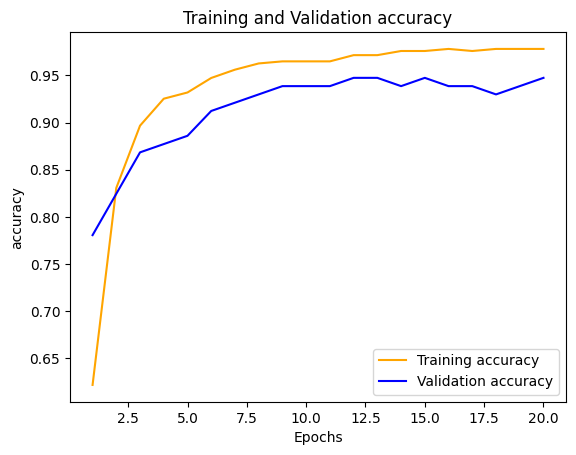

In [13]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

In [14]:
from keras.layers import Dense, BatchNormalization, Dropout

In [15]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [16]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0],1:class_weights[1]})

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2990 - loss: 1.4039 - val_accuracy: 0.4561 - val_loss: 0.7411
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5735 - loss: 0.7536 - val_accuracy: 0.6930 - val_loss: 0.6320
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8235 - loss: 0.4192 - val_accuracy: 0.8684 - val_loss: 0.5471
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8932 - loss: 0.2634 - val_accuracy: 0.9386 - val_loss: 0.4827
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9077 - loss: 0.1991 - val_accuracy: 0.9737 - val_loss: 0.4342
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9447 - loss: 0.1506 - val_accuracy: 0.9737 - val_loss: 0.3969
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9440 - loss: 0.1388 - val_accuracy: 0.9737 - val_loss: 0.3677
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9536 - loss: 0.1213 - val_accuracy: 0.9737 - val_loss: 0.3444
Ep

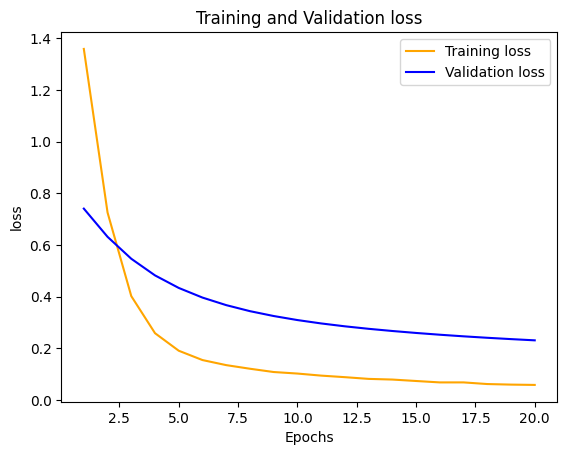

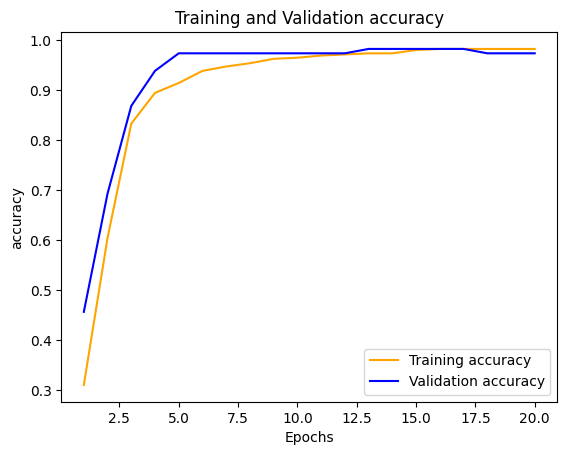

In [17]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

In [18]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [19]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0],1:class_weights[1]})

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6958 - loss: 0.6146 - val_accuracy: 0.7456 - val_loss: 0.5997
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8699 - loss: 0.3645 - val_accuracy: 0.8333 - val_loss: 0.5374
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9103 - loss: 0.2901 - val_accuracy: 0.8947 - val_loss: 0.4851
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9492 - loss: 0.2038 - val_accuracy: 0.9211 - val_loss: 0.4421
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9573 - loss: 0.1698 - val_accuracy: 0.9211 - val_loss: 0.4070
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9492 - loss: 0.1551 - val_accuracy: 0.9298 - val_loss: 0.3777
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9549 - loss: 0.1435 - val_accuracy: 0.9386 - val_loss: 0.3530
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9497 - loss: 0.1337 - val_accuracy: 0.9386 - val_loss: 0.3323
Ep

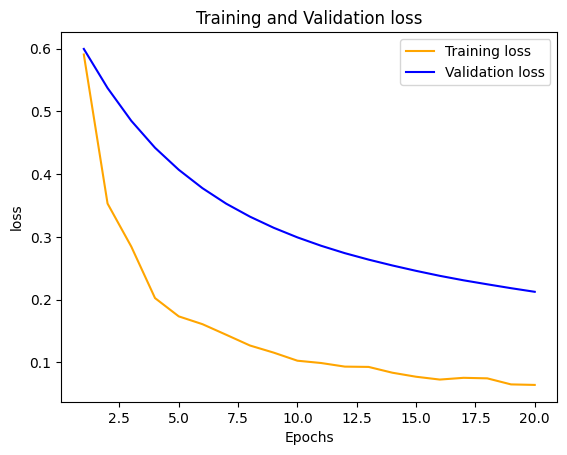

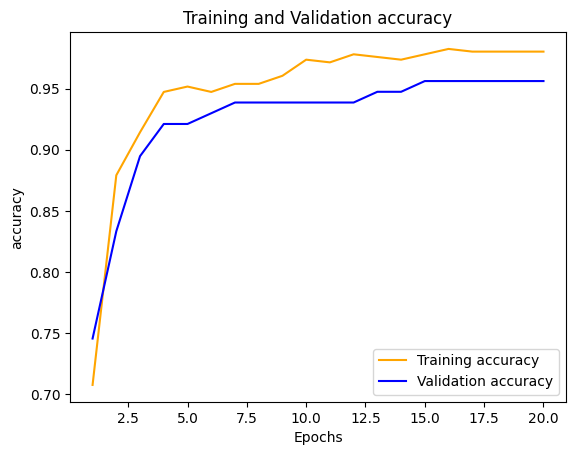

In [20]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

In [21]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [22]:
model.predict(X_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


array([[1.3933589e-02],
       [9.0931290e-01],
       [1.5804590e-01],
       [4.7200963e-01],
       [1.1999433e-02],
       [8.3069283e-01],
       [9.3067539e-01],
       [1.4385310e-02],
       [8.8300146e-02],
       [9.4003836e-04],
       [8.0733585e-01],
       [1.3071586e-01],
       [9.0613657e-01],
       [9.1825038e-02],
       [1.3059828e-01],
       [6.6343325e-01],
       [3.9056805e-01],
       [5.7868332e-01],
       [9.0085608e-01],
       [7.6612008e-01],
       [1.3732551e-01],
       [3.1083670e-01],
       [8.7960589e-01],
       [8.6377853e-01],
       [7.8776884e-01],
       [7.2599930e-01],
       [1.2257938e-02],
       [8.0136573e-01],
       [8.4846491e-01],
       [8.5639596e-01],
       [8.1189483e-01],
       [9.2799354e-01],
       [8.3008194e-01],
       [7.4509835e-01],
       [6.1258659e-02],
       [5.1759893e-01],
       [8.5196114e-01],
       [6.6647834e-01],
       [6.5199184e-01],
       [4.3373562e-02],
       [9.1630268e-01],
       [8.933600

In [23]:
treshold = 0.5
y_pred = [1 if i > treshold else 0 for i in model.predict(X_val)]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [24]:
print(classification_report(y_val, np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [25]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [27]:
model = create_model()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
save_best_weights = ModelCheckpoint(filepath='.weights.h5',
                                    save_weights_only=True,
                                    monitor='val_accuracy',
                                    mode='max',
                                    save_best_only=True)

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=10,
           batch_size=256,
           class_weight={0:class_weights[0],1:class_weights[1]},
           callbacks=[early_stopping,save_best_weights])

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 886ms/step - accuracy: 0.6064 - loss: 0.8301 - val_accuracy: 0.6491 - val_loss: 0.5855
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7037 - loss: 0.6109 - val_accuracy: 0.8684 - val_loss: 0.4765
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8799 - loss: 0.4823 - val_accuracy: 0.9211 - val_loss: 0.4039
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9390 - loss: 0.3788 - val_accuracy: 0.9211 - val_loss: 0.3541
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9409 - loss: 0.3227 - val_accuracy: 0.9035 - val_loss: 0.3176
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9404 - loss: 0.2774 - val_accuracy: 0.9035 - val_loss: 0.2886
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9464 - loss: 0.2500 - val_accuracy: 0.9035 - val_loss: 0.2642
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9479 - loss: 0.2264 - val_accuracy: 0.9035 - val_loss: 0.2425

In [28]:
model.load_weights(".weights.h5")

In [29]:
treshold = 0.5
y_pred = [1 if i > treshold else 0 for i in model.predict(X_val)]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_val, y_pred)

0.9210526315789473